In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data=data.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score(1-100)':'score'})

In [ ]:
data = data.drop('CustomerID', axis=1)
data

,gender,age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
data.shape

(200, 4)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['gender']=label_encoder.fit_transform(data['gender'])

data['gender'].unique()


array([1, 0])

In [ ]:
data.describe()

,gender,age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


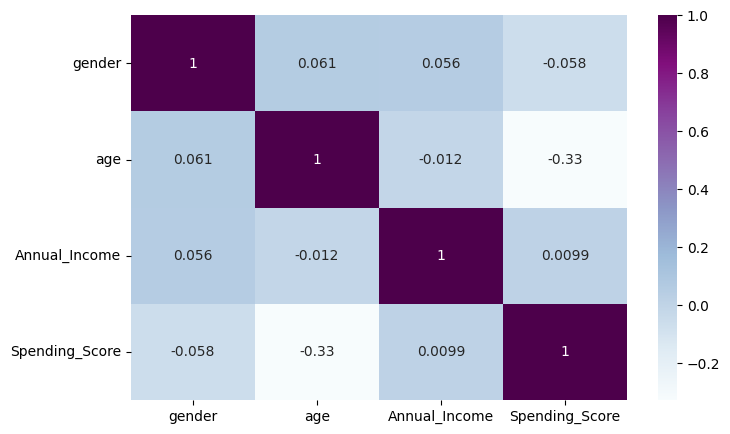

In [ ]:
# finding correlation between all parameters
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap="BuPu",ax=ax)
plt.show()

In [ ]:
# seperate for upper than 50 scores
mask=data['Spending_Score']>50
upper_50=data[mask]
upper_50

,gender,age,Annual_Income,Spending_Score
1,1,21,15,81
3,0,23,16,77
5,0,22,17,76
7,0,23,18,94
9,0,30,19,72
...,...,...,...,...
191,0,32,103,69
193,0,38,113,91
195,0,35,120,79
197,1,32,126,74


In [ ]:
upper_50.describe()

,gender,age,Annual_Income,Spending_Score
count,97.000000,97.000000,97.000000,97.000000
mean,0.453608,34.597938,60.412371,71.670103
std,0.500429,13.024544,26.756133,14.710910
min,0.000000,18.000000,15.000000,51.000000
25%,0.000000,26.000000,42.000000,57.000000
50%,0.000000,31.000000,60.000000,73.000000
75%,1.000000,38.000000,78.000000,85.000000
max,1.000000,70.000000,137.000000,99.000000


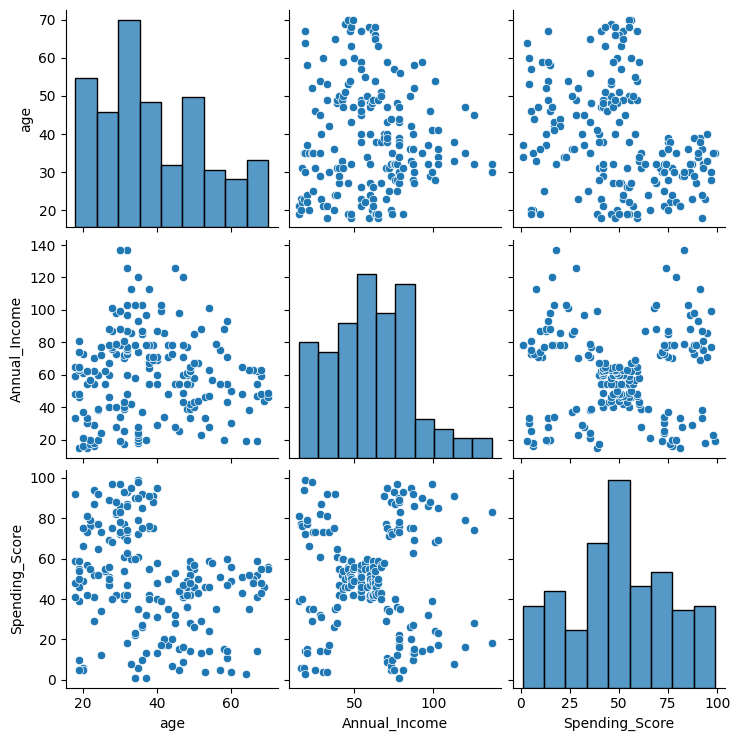

In [ ]:
# histrogram
# for visualization
sns.pairplot(data,vars=['age','Annual_Income','Spending_Score'])
plt.show()

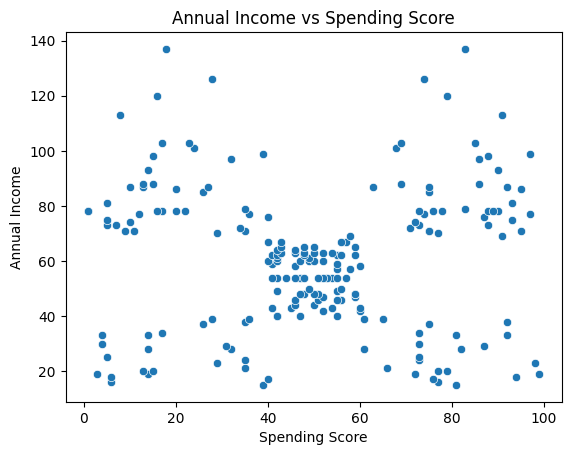

In [ ]:
sns.scatterplot(x='Spending_Score',y='Annual_Income',data=data)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
# split
# k-mean cluster

X=data.iloc[:,[2,3]]
print(f"X shape: {X.shape}")
X.head()

X shape: (200, 2)


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Cluster using k-means**


In [ ]:
# segmentation using annual income and spending
n_